# Exercise: NEISS, Question Set C

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Reading tab-separated files
- Ignoring bad lines
- Replacing values
- Using numpy/`np.nan`
- String search using regular expressions
- Averages practice
- Converting `.value_counts()` and similar results into DataFrames

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [1]:
import pandas as pd
df = pd.read_csv("nss15.tsv", sep="\t", error_bad_lines=False)
df.head()

b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


### Check that your dataframe has 357727 rows and 19 columns.

In [2]:
df.shape

(357727, 19)

### List the columns and their data types

In [3]:
df.dtypes


CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1            int64
prod2          float64
narr1           object
narr2           object
dtype: object

### What does each column mean?

In [4]:
# In the other notebook


# Cleaning up a column

Take a look at the **sex** column. How many rows of each sex are there?

In [4]:
df['sex'].value_counts()
# male : 1, female : 2, not recorded : 0


1    195071
2    162654
0         2
Name: sex, dtype: int64

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to page 7 of the column definitions file.

In [5]:
replacements = {
    0: 'Not recorded',
    1: 'Male',
    2: 'Female'
}

df.sex.replace(replacements, inplace=True)
df.head()


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,Female,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,Male,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,Female,3,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


## Confirm you have 195071 male, 162654 female, and 2 "Not Recorded."

In [6]:
df.sex.value_counts()
# print(df[df.sex == 'Male'].shape[0])
# print(df[df.sex == 'Female'].sex.value_counts()  )
# print(df[df.sex == 'Not recorded'].sex.value_counts()  )


Male            195071
Female          162654
Not recorded         2
Name: sex, dtype: int64

## Graph the number of men and women, but don’t included the “Not Recorded” records

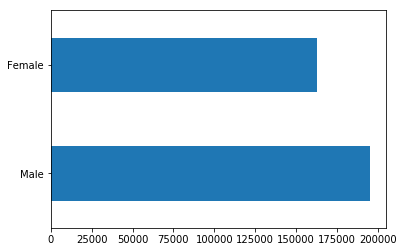

In [7]:
%matplotlib inline
df[df.sex != 'Not recorded'].sex.value_counts().plot(kind = 'barh')


## "Not recorded" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [8]:
import numpy as np
np.nan
df.sex.replace('Not recorded', np.nan, inplace = True) # don't write "NaN"
df.head()


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,Female,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,Male,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,Female,3,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


In [9]:
df.sex.value_counts()
# print(df[df.sex == 'Male'].sex.value_counts()  )
# print(df[df.sex == 'Female'].sex.value_counts()  )
# print(df[df.sex == 'Not recorded'].sex.value_counts()  )


Male      195071
Female    162654
Name: sex, dtype: int64

## Graph the count of men and women, but don’t included the “Not Recorded” records

Yes, again! The code you use should be different this time.

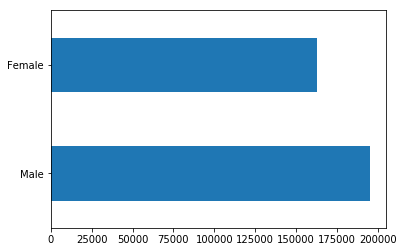

In [10]:
df.sex.value_counts().plot(kind = 'barh')


# Wall punching

## Find every instance where the narrative includes punching a wall

Include phrases like "punched a wall" or "punch wall" or "punched ten thousand walls." Do not type them each individually. How do you do that?????

In [11]:
df[df.narr1.str.contains(r"PUNCH.*WALL", na=False)].narr1.value_counts()


17YOM PUNCHED A WALL                                                       4
16 YO MALE PUNCHED A WALL.  DX FINGER FX                                   3
33 YOM PUNCHED A WALL.                                                     2
RIGHT HAND CONTUSION. 34 YOF PUNCHED A WALL.                               2
13YOM FX HAND- PUNCHED WALL                                                2
22YOF FX HAND- PUNCHED WALL                                                2
RIGHT HAND FX. 29 YOM PUNCHED A WALL.                                      2
33 YOM FX HAND WHEN PUNCHED A WALL                                         2
RIGHT HAND FX. 16 YOM PUNCHED A WALL.                                      2
31 YOM PUNCHED A WALL AND INJURED HAND                                     2
RIGHT HAND CONTUSION. 19 YOF PUNCHED A WALL.                               2
19 YOM PUNCHED A WALL AND INJURED HAND                                     2
29YOM PUNCHED A WALL AND SUSTAINED A HAND FRACTURE                         2

## Graph the gender distribution of wall-punching.

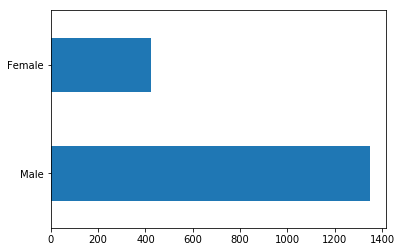

In [12]:
df[df.narr1.str.contains(r"PUNCH.*WALL", na=False)].sex.value_counts().plot(kind='barh')



## Find the average age of a wall-puncher.

Graph the distribution of the ages, too.

In [13]:
print( round(df[df.narr1.str.contains(r"PUNCH.*WALL", na=False)].age.mean(),2), "-years old" )


24.3 -years old


# Which months are the most popular for wall punching?

The month is hidden inside of the `trmt_date` column - you'll need to extract it. To check, January should have 27109 cases.

In [14]:
df[df.narr1.str.contains(r"PUNCH.*WALL", na=False)].trmt_date.str.extract(r"(\d\d)\/\d\d\/\d\d\d\d").value_counts().head(1)
# month that is most popular for wall punching : September

# df.trmt_date.str.extract("(\d\d\d\d)") # year
# df.trmt_date.str.extract("FELL OFF (\w+)").dropna()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


09    175
Name: trmt_date, dtype: int64

## Graph the amount of wall punching in each month

Having numbers on the x axis (1-12) is fine.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


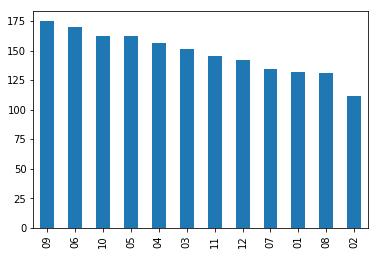

In [15]:
df[df.narr1.str.contains(r"PUNCH.*WALL", na=False)].trmt_date.str.extract(r"(\d\d)\/\d\d\/\d\d\d\d").value_counts().plot(kind = 'bar')


## Sort the graph so that the months are in order from Jan-Dec (or 01-12)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


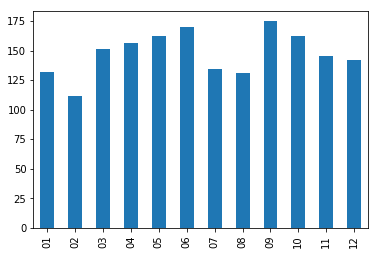

In [16]:
df[df.narr1.str.contains(r"PUNCH.*WALL", na=False)].trmt_date.str.extract(r"(\d\d)\/\d\d\/\d\d\d\d").value_counts().sort_index().plot(kind = 'bar')
# 'sort_index' VS 'sort_values'


## What month is most common for air conditioner-related injuries?

Use the product code, which you can find in `2017ComparabilityTable.pdf` or `categories-cleaned.txt`.

In [17]:
df[df.narr1.str.contains(r"AIR.*CONDITIONER", na=False)].trmt_date.str.extract(r"(\d\d)\/\d\d\/\d\d\d\d").value_counts().head(1)
# "AIR CONDITIONER", AIRCONDITIONER
# July


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


07    35
Name: trmt_date, dtype: int64

## Find what else people punched using the prod1 and prod2 columns.

Look at the top 10 for each separately.

In [18]:
df[df.narr1.str.contains("PUNCH", na=False)].prod1.value_counts().head(10)
# 1884 : interior part of completed structure
# 1894 : Windows and window glass, other than storm windows
# 1893 : Doors, other or not specified
# 1207 : Boxing (activity, apparel or equipment)
# 4004 : Mirrors or mirror glass (excluding lighted make-up mirrors)

# 0276 : Refrigerators
# 4057 : Tables
# 1892 : Glass doors or doors with glass panels
# 1726 : Lockers
# 1807 : Floors or flooring materials


1884    1796
1894     566
1893     244
1207     159
4004     122
276       74
4057      53
1892      48
1726      42
1807      41
Name: prod1, dtype: int64

In [19]:
df[df.narr1.str.contains("PUNCH", na=False)].prod2.value_counts().head(10)
# 1884 : interior part of completed structure
# 1893 : Doors, other or not specified
# 1207 : Boxing (activity, apparel or equipment)
# 1807 : Floors or flooring materials.
# 1892 : Glass doors or doors with glass panels

# 4056 : Cabinets, racks, room dividers andshelves, not elsewhere classified 
# 0604 : Desks/dressers/chests/bureaus/buffets 
# 1865 : Poles (excl. fence posts, fishing, pole vaults, playground equipment and telephone poles) 
# 1819 : Nails, screws, carpet tacks or thumbtacks -> Nails, screws, tacks or bolts
# 0676 : Rugs or carpets, not specified


1884.0    31
1893.0    13
1207.0     7
1807.0     7
1892.0     6
4056.0     6
604.0      4
1865.0     4
1819.0     3
676.0      3
Name: prod2, dtype: int64

## Uh, they're the same!

The order of `prod1` and `prod2` don't actually matter!

> When only one product is associated with an injury, place the product code for that product in the space allocated for "First Product Code" and fill in the "Second Product Code" spaces with 4 zeros (0000).
When two products are associated with an injury, either product may be coded as the first product and the other as the second product.
>
> Example: An 11-year old boy riding a bicycle ran into a swing. Code: Product 1 = 5040 (bicycle) and Product 2 = 3246 (swings) or
>
> Code: Product 1 = 3246 (swings) and Product 2 = 5040 (bicycle)

## Okay, okay, there’s no difference between prod1 and prod2, so you should add their frequencies together for an overall count!

It's *almost* as easy as adding together the `value_counts()`.

Take a look at the air conditioner question and the `.value_counts()` you just did, though, to see why combining them might not be that simple. **What is different about `prod1` and `prod2`?** You probably have to go all the way back up to where you read the file in to make them match.

In [20]:
# prod1 is in int, prod2 is in float

rows_with_punch = df[df.narr1.str.contains("PUNCH", na=False)]

def convert(value) :
    if np.isnan(value) :
        return np.nan
    else :
        return int(value)
    
convert1 = rows_with_punch.prod1.apply(convert ).value_counts().sort_index()
convert2 = rows_with_punch.prod2.apply(convert ).value_counts().sort_index()

convert1.add(convert2, fill_value=0)


115.0       1.0
136.0       1.0
137.0       1.0
138.0       1.0
140.0       1.0
215.0       1.0
263.0       3.0
264.0       3.0
276.0      74.0
380.0       1.0
381.0       1.0
413.0      11.0
428.0       2.0
450.0       1.0
464.0       2.0
474.0       5.0
478.0      11.0
482.0       1.0
519.0       1.0
546.0       4.0
550.0       1.0
557.0       8.0
563.0       2.0
572.0      38.0
576.0       1.0
604.0      42.0
611.0       1.0
627.0       5.0
648.0       2.0
649.0       2.0
          ...  
3265.0      4.0
3272.0      2.0
3273.0      1.0
3274.0      1.0
3277.0      1.0
3278.0      2.0
3286.0      1.0
4004.0    124.0
4009.0      1.0
4014.0      2.0
4025.0      1.0
4030.0      1.0
4041.0      1.0
4042.0      1.0
4056.0     43.0
4057.0     53.0
4061.0      1.0
4062.0      1.0
4063.0      4.0
4067.0      1.0
4071.0      2.0
4074.0     18.0
4075.0      2.0
4076.0      9.0
4078.0      2.0
4079.0      2.0
5011.0      1.0
5034.0      2.0
5040.0      1.0
5041.0      2.0
Length: 132, dtype: floa

## Turn that into a dataframe

Use `.reset_index()` on the result to turn it into a dataframe. Rename your columns to be `product_code` and `injury_count`.

In [21]:
df_prod_frequency = convert1.reset_index()
df_prod_frequency = df_prod_frequency.rename(columns = {'index':'product_code', 'prod1':'injury_count'})
df_prod_frequency

,product_code,injury_count
0,115,1
1,136,1
2,137,1
3,138,1
4,140,1
5,215,1
6,263,3
7,264,3
8,276,74
9,380,1


## Fix the product codes

Uh, wait, look at those product codes. "102" shouldn't be possible, it should be `0102` - this actually doesn't have to do with coding, it has to do with *the data doesn't match the codebook*.

### Add zeroes to the left of the product code until it is 4 characters long

In [22]:
df_prod_frequency.product_code = df_prod_frequency.product_code.astype(str).str.pad(4, fillchar='0')
df_prod_frequency


,product_code,injury_count
0,0115,1
1,0136,1
2,0137,1
3,0138,1
4,0140,1
5,0215,1
6,0263,3
7,0264,3
8,0276,74
9,0380,1


## Get meaningful names for "product code"

Join with `categories-cleaned.txt` to turn the codes into actual words. **When you read in `categories-cleaned.txt`, make sure it has 803 rows and 2 columns.**

In [23]:
df_pro = pd.read_csv("categories_cleaned.txt", error_bad_lines=False, header = None)
df_pro.head()

,0,1
0,102,Wringer washing machines
1,106,Electric clothes dryers without washers
2,107,Gas clothes dryers without washers
3,110,Electric heating pads
4,112,Sewing machines or accessories


In [24]:
df_pro = df_pro.rename(columns = {0:'prod1', 1:'product code'})
df_pro.head()


,prod1,product code
0,102,Wringer washing machines
1,106,Electric clothes dryers without washers
2,107,Gas clothes dryers without washers
3,110,Electric heating pads
4,112,Sewing machines or accessories


In [25]:
df.prod1 = df.prod1.astype(str).str.pad(4, fillchar='0')

In [26]:
df.prod2 = df.prod2.astype(str).str.pad(4, fillchar='0')

In [27]:
df_pro.prod1 = df_pro.prod1.astype(str).str.pad(4, fillchar='0')
df_pro.head()

,prod1,product code
0,0102,Wringer washing machines
1,0106,Electric clothes dryers without washers
2,0107,Gas clothes dryers without washers
3,0110,Electric heating pads
4,0112,Sewing machines or accessories


In [28]:
df_merge = df.merge(df_pro, on="prod1")
df_merge.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2,product code
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,33,1,9,0,1267,0nan,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT,"Soccer (activity, apparel or equipment)"
1,150821622,07/20/2015,43,83.2157,S,20,Female,1,NaN,57,NaN,36,1,9,0,1267,0nan,L DISTAL FIB FX/20YOWF WHILE PLAYING SOCCER AT...,LE CAUSING INJURY TO DISTAL FIB.,"Soccer (activity, apparel or equipment)"
2,150948626,09/08/2015,37,5.6748,C,10,Female,0,NaN,57,NaN,33,1,0,0,1267,0nan,10 YO F TRIPPED FORWARD WHEN PLAYING SOCCER FX...,NaN,"Soccer (activity, apparel or equipment)"
3,151029422,10/06/2015,24,97.9239,M,37,Male,1,NaN,64,NaN,35,1,0,0,1267,0nan,J/ 37 YOM. LT KNEE PAIN AFTER HE KICKED THE BA...,DXL KNEE SPRAIN,"Soccer (activity, apparel or equipment)"
4,151029234,10/10/2015,21,16.5650,V,13,Female,0,NaN,62,NaN,75,1,9,0,1267,0nan,13YF H/A&VOMITINGX4 S/P GOT STRUCK TO HEAD C T...,>>CHI,"Soccer (activity, apparel or equipment)"


### Confirm that it worked by seeing if product code '0102' gives you 'Wringer washing machines"

In [29]:
df_merge.prod1.value_counts().sort_index()

0106       18
0107        6
0110       63
0112       59
0113       12
0114       13
0115      371
0116        1
0118       21
0119        1
0125        1
0127      134
0131       45
0132        6
0133        4
0134       53
0136       48
0137       44
0138       37
0139        1
0140      298
0212        1
0213        1
0214      154
0215      236
0216       10
0217       12
0218        3
0219       18
0221        1
        ...  
4083        2
4084        4
4802       26
5001        8
5005      136
5006       22
5010      149
5011      253
5013        1
5016      495
5017      344
5018       35
5019      114
5020       97
5021      311
5029      123
5030      855
5031      579
5032       32
5033      206
5034     2059
5035       36
5036     1119
5037       86
5040    12737
5041     3063
5042      382
5043       40
5044       26
5555       27
Name: prod1, Length: 756, dtype: int64

In [30]:
df_merge[df_merge.prod1 == "0102"]['product code']
# there is no case with prod1 == "0102"

Series([], Name: product code, dtype: object)

In [31]:
df_pro[df_pro.prod1 == "0102"]['product code']

0    Wringer washing machines
Name: product code, dtype: object

## Graph the top 10 most popular products for injuries 

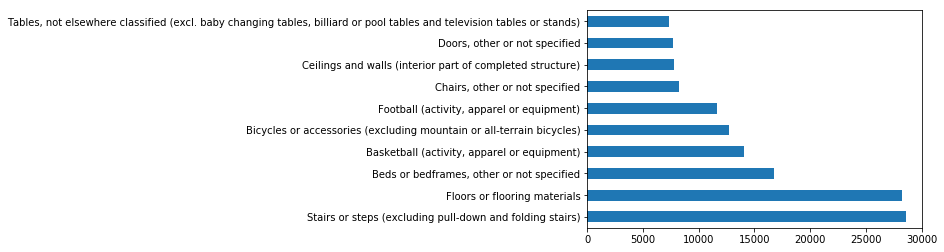

In [32]:
df_merge['product code'].value_counts().head(10).plot(kind = 'barh')